<a href="https://colab.research.google.com/github/jbross5743/Bross_Geog279/blob/main/bross_geog279_assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/15X79Y4QTRdeXTVVapthpGOS8_dzFw3-j?usp=sharing)


<table style="border: 1px solid #4CAF50; background-color: #f9f9f9; padding: 10px; width: 100%;">
  <tr>
    <td>
      <h1 style="font-family: 'Times New Roman'; font-size: 24px; background-color: lightgray;">
        <b>GEOG279 - Fall 2024</b>
      </h1>
      <h1 style="font-family: 'Times New Roman'; font-size: 24px; background-color: lightgray;">
        <b>Assignment 3: Measuring Program Impacts: Diff-in-Diff and Instrumental Variables</b>
      </h1>
      <h3 style="font-family: 'Times New Roman'; font-size: 18px; background-color: lightgray;">
        <b>Instructor</b>: Kathy Baylis
      </h3>
      <h4 style="font-family: 'Times New Roman'; font-size: 16px; background-color: lightgray;">
        <b>Due Date</b>: Tuesday, November 12th
      </h4>
    </td>
  </tr>
</table>

<table style="border: 1px solid #4CAF50; background-color: #f9f9f9; padding: 10px; width: 100%;">
  <tr>
    <td>
      <h3 style="font-family: 'Times New Roman'; font-size: 18px;">
        <b>First & Last Name:</b> <span style="border-bottom: 1px solid black; padding-left: 100px;"></span>
      </h3>
    </td>
  </tr>
</table>

________*Add Name Here*_________________

Judith Bross
---

*Gemini AI was used for this assignment.*








# **Assignment Overview: Estimating Causal Effects with Difference-in-Differences (DID) and Synthetic Control Methods**

In this assignment, we explore methods for estimating the causal impact of a policy intervention using **Difference-in-Differences (DID)** and **Synthetic Control** techniques. These methods allow us to construct counterfactuals, which estimate what the outcome of treated units would have been had the intervention not occurred. By applying DID and Synthetic Control, we can infer treatment effects without relying on randomized trials, making these methods valuable for analyzing real-world, observational data.

Our dataset stems from a natural experiment that examines the economic impact of a policy intervention. Throughout this assignment, we will build synthetic control units, apply DID techniques, and estimate the **Average Treatment Effect (ATE)** and **Local Average Treatment Effect (LATE)** using instrumental variables (IVs).

## **Key Objectives:**

**1.	Calculate Simple and Difference-in-Differences Estimates:** We begin by calculating basic outcome differences and then move to DID to estimate the impact of treatment.

**2.	Identify and Evaluate Potential IVs:** Using our dataset, we assess possible instrumental variables and their effectiveness in addressing endogeneity.

**3.	Perform IV Estimation for LATE:** We implement IV regression to estimate LATE, providing a refined approach for treatment effect estimation when endogeneity is a concern.

Through this assignment, you will gain experience in constructing counterfactuals, analyzing treatment effects, and understanding the strengths of DID and IV methods for causal inference.



---



<span style="font-family: 'Times New Roman'; font-size: 14px;">
  <h2><b>Getting Started</b></h2>
</span>

<p><b>Before Getting Started: Change Runtime to R</b></p>

<p>Before proceeding with the assignment, you need to ensure that the runtime environment is set to R. Follow these steps:</p>

<ol>
  <li>Click on the <b>“Runtime”</b> tab in the menu at the top of the notebook.</li>
  <li>Select <b>“Change runtime type”</b> from the dropdown.</li>
  <li>In the <b>“Runtime type”</b> dialog box, select <b>“R”</b> from the “Runtime type” dropdown menu.</li>
  <li>Click <b>“Save”</b> to apply the changes.</li>
</ol>

<p>Once you’ve changed the runtime to R, you can proceed with the assignment.</p>

<p><b>Important:</b> Make sure to save your script as <code> your_initials_assignment3.ipynb</code> to ensure consistent naming for the autograder in Gradescope. Please, only use the cells where it says <b>Your code here</b> or <b>Your answer here</b> to include your code and responses.</p>



## **Loading libraries**

In [1]:
# Installing required libraries
suppressMessages({
  suppressWarnings({
    install.packages("tidyverse", quiet = TRUE)    # For data manipulation and visualization
    install.packages("MatchIt", quiet = TRUE)      # For matching in observational studies
    install.packages("AER", quiet = TRUE)          # For applied econometrics functions
    install.packages("xpectr", quiet = TRUE)
    install.packages("ggdid", quiet = TRUE)
  })
})

# Loading libraries
library(xpectr)
library(tidyverse)    # Data manipulation and visualization
library(MatchIt)      # Matching for observational studies
library(AER)          # Applied Econometrics with R

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: car

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some


Loading required package: lmtest

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich

Loading required package: survival


## **Loading the data**

Begin by loading the dataset `VDSA_Prod_Data_Ref.csv`. Ensure that any relevant variables are already log-transformed as needed for analysis. For reference on data labels and descriptions, consult the accompanying file: [VDSA_Prod_Data_Ref_labels.csv](https://github.com/GEOG279-Advanced-Spatial-Statistics/GEOG279-Course/blob/main/assignment_3/data/VDSA_Prod_Data_Ref_labels.csv)


In [2]:
suppress_mw({
# URL for the raw file (CSV format)
url <- "https://raw.githubusercontent.com/GEOG279-Advanced-Spatial-Statistics/GEOG279-Course/main/assignment_3/data/VDSA_Prod_Data_Ref.csv"

# Read the CSV file directly from GitHub's raw URL
df <- read_csv(url)

# View the first few rows of the data
head(df)
})

country,vil_id,rain,average,dev,pop,dist,nomkt,vdsa_hh_id,tot_acre,⋯,lnl,lnf,lni,lnm,lnp,irr,lnaindex,lnlindex,lntot_acre,lndist
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
India,119,NA,NA,NA,3600,5,4,119035,1.22,⋯,6.396885,6.418075,4.688918,9.364208,0.000000,1,-0.22474804,-0.390123289,1.0287141,2.312438
India,119,495.660,577.3553,0.8585009,3600,5,4,119034,0.87,⋯,5.286696,5.286696,1.219146,8.226714,0.000000,1,-1.11807953,-0.916530001,0.7864012,2.312438
India,119,470.766,577.3553,0.8153836,3600,5,4,119034,1.15,⋯,6.533205,6.650988,0.000000,8.690762,0.000000,0,-0.99749054,-0.908523784,0.9835661,2.312438
India,120,470.766,577.3553,0.8153836,4494,15,4,120048,1.80,⋯,6.038564,5.692147,0.000000,8.108049,7.771577,0,0.07428161,-0.119476259,1.3504407,3.402307
India,119,495.660,577.3553,0.8585009,3600,5,4,119034,0.87,⋯,5.327516,5.440840,1.308909,8.116611,0.000000,1,-1.11807953,-0.916530001,0.7864012,2.312438
India,137,NA,NA,NA,880,13,2,137032,5.00,⋯,5.994008,5.866497,0.000000,8.282403,0.000000,0,-0.33563854,0.007208664,2.3124383,3.259573


# **I. Difference-in-Difference (DiD)**

To explore the DiD approach, we'll first examine simple differences, similar to the Within/Without and Before/After comparisons from the previous assignment.

For this assignment, we’ll focus specifically on observations from the years 2010 and 2011. To do this, we will filter the dataset `df` to exclude observations from 2012, retaining only data from 2010 and 2011.


In [3]:
# Filter the dataset to include only the years 2010 and 2011
df_filtered <- dplyr::filter(df, sur_yr %in% c(2010, 2011))

# View the first few rows of the filtered dataset
head(df_filtered)

country,vil_id,rain,average,dev,pop,dist,nomkt,vdsa_hh_id,tot_acre,⋯,lnl,lnf,lni,lnm,lnp,irr,lnaindex,lnlindex,lntot_acre,lndist
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
India,119,495.6600,577.3553,0.8585009,3600,5.0,4,119034,0.87,⋯,5.286696,5.286696,1.219146,8.226714,0.000000,1,-1.11807953,-0.916530001,0.7864012,2.312438
India,119,470.7660,577.3553,0.8153836,3600,5.0,4,119034,1.15,⋯,6.533205,6.650988,0.000000,8.690762,0.000000,0,-0.99749054,-0.908523784,0.9835661,2.312438
India,120,470.7660,577.3553,0.8153836,4494,15.0,4,120048,1.80,⋯,6.038564,5.692147,0.000000,8.108049,7.771577,0,0.07428161,-0.119476259,1.3504407,3.402307
India,119,495.6600,577.3553,0.8585009,3600,5.0,4,119034,0.87,⋯,5.327516,5.440840,1.308909,8.116611,0.000000,1,-1.11807953,-0.916530001,0.7864012,2.312438
India,137,NA,NA,NA,880,13.0,2,137032,5.00,⋯,5.994008,5.866497,0.000000,8.282403,0.000000,0,-0.33563854,0.007208664,2.3124383,3.259573
India,118,464.9214,500.7051,0.9285335,3000,4.5,4,118030,1.10,⋯,5.306898,5.807657,1.488013,8.330545,0.000000,1,-0.75514344,0.198274990,0.9503469,2.209348


###  **Q1. Simple Difference (2011): Conduct a `t-test` (`lny,` by (`irr`)) to examine whether parcels in the irrigation program had higher yield than parcels not in the program, using observations from 2011 only. What does this measure?**

In [4]:
# filter for 2010 and 2011
df_filtered <- dplyr::filter(df, sur_yr %in% c(2010, 2011))

# dataframe using 2011 data ONLY
df_2011 <- dplyr::filter(df_filtered, sur_yr == 2011)

#t-test on the 2011 data.
q1_test <- t.test(lny ~ irr, data = df_2011)


print(q1_test)


	Welch Two Sample t-test

data:  lny by irr
t = -2.8699, df = 324.39, p-value = 0.004375
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -0.5607522 -0.1046359
sample estimates:
mean in group 0 mean in group 1 
       8.189327        8.522022 



The t-test shows a statistically significant (p=0.004375) difference in 2011, where treated parcels (irr=1) had a higher average log-yield (8.522) than control parcels (irr=0, 8.189). This comparison only measures the simple difference in the "after" period and is likely a biased estimate of the program's impact and possibly ignores any pre-existing differences between the groups.




---



## **DiD Setup**

To set up the **Difference-in-Differences (DiD)** analysis, we establish key variables that allow us to compare yield changes over time between treatment and control groups. First, we create a baseline log yield variable, `log_yield_2010`, which captures each parcel’s yield in 2010.

Next, for each parcel, we calculate `max_log_yield_2010` to store the maximum yield value recorded in 2010, ensuring we have a consistent reference point for baseline yield.

We then filter the dataset to include only observations from 2011, focusing on the period following the intervention. In this subset, we define `log_yield_2011` to represent the log yield for 2011.

Finally, we calculate `yield_change_2010_2011` as the difference in yield from 2010 to 2011 for each parcel. This variable serves as the core DiD measure, capturing yield changes over time and allowing us to compare differences between treated and control groups effectively.




In [5]:
library(dplyr)
options(warn = -1)

# Step 1: Filter data to create a separate dataframe for 2010 observations
df_2010 <- df_filtered %>% filter(sur_yr == 2010)

# Step 2: Create a baseline log yield variable for 2010 within df_2010
df_2010 <- df_2010 %>%
  mutate(log_yield_2010 = lny)

# Step 3: Calculate the maximum log yield for 2010 by parcel ID, handling NA values
# Join this result back to the main df_filtered to use in DiD analysis with 2011 data
df_max_yield_2010 <- df_2010 %>%
  group_by(prcl_id) %>%
  summarize(max_log_yield_2010 = max(log_yield_2010, na.rm = TRUE)) %>%
  ungroup()

# Step 4: Filter data to create a separate dataframe for 2011 observations
df_2011 <- df_filtered %>% filter(sur_yr == 2011)

# Step 5: Join max_log_yield_2010 to df_2011 to calculate the DiD variable
df_2011 <- df_2011 %>%
  left_join(df_max_yield_2010, by = "prcl_id") %>%
  mutate(log_yield_2011 = lny,
         yield_change_2010_2011 = log_yield_2011 - max_log_yield_2010)

# Step 6: Handle Inf values in yield_change_2010_2011 by replacing them with NA
df_2011 <- df_2011 %>%
  mutate(yield_change_2010_2011 = ifelse(is.infinite(yield_change_2010_2011), NA, yield_change_2010_2011))

# Optional: Remove rows with NA in yield_change_2010_2011 if needed for further analysis
df_2011 <- df_2011 %>% filter(!is.na(yield_change_2010_2011))

# View the first few rows of the processed data
head(df_2011)

country,vil_id,rain,average,dev,pop,dist,nomkt,vdsa_hh_id,tot_acre,⋯,lnm,lnp,irr,lnaindex,lnlindex,lntot_acre,lndist,max_log_yield_2010,log_yield_2011,yield_change_2010_2011
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
India,119,495.6600,577.3553,0.8585009,3600,5.0,4,119034,0.87,⋯,8.226714,0,1,-1.1180795,-0.9165300,0.7864012,2.312438,7.669298,8.911011,1.2417129
India,119,495.6600,577.3553,0.8585009,3600,5.0,4,119034,0.87,⋯,8.116611,0,1,-1.1180795,-0.9165300,0.7864012,2.312438,7.567277,8.362445,0.7951686
India,118,464.9214,500.7051,0.9285335,3000,4.5,4,118030,1.10,⋯,8.330545,0,1,-0.7551434,0.1982750,0.9503469,2.209348,8.931214,11.043445,2.1122313
India,118,464.9214,500.7051,0.9285335,3000,4.5,4,118030,1.10,⋯,8.323225,0,1,-0.7551434,0.1982750,0.9503469,2.209348,9.016372,8.728690,-0.2876821
India,119,495.6600,577.3553,0.8585009,3600,5.0,4,119034,0.87,⋯,7.984568,0,1,-1.1180795,-0.9165300,0.7864012,2.312438,7.512295,7.899411,0.3871158
India,119,495.6600,577.3553,0.8585009,3600,5.0,4,119035,0.75,⋯,8.265596,0,1,-0.2247480,-0.3901233,0.6931472,2.312438,7.366112,8.282403,0.9162904


### **Q2.	Conduct a DiD `t-test:`**

**a) Perform a `t-test` to compare the change in log yield from 2010 to 2011 between parcels in the irrigation program and those not in the program. This will provide a DiD estimate of the yield impact.**




In [6]:

#t-test on the yield change

q2_test <- t.test(yield_change_2010_2011 ~ irr, data = df_2011)


print(q2_test)


	Welch Two Sample t-test

data:  yield_change_2010_2011 by irr
t = -0.14364, df = 173.76, p-value = 0.8859
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -0.5027364  0.4345238
sample estimates:
mean in group 0 mean in group 1 
    -0.04803822     -0.01393192 



**b) Compare this result to the simple yield difference found in Q1. If the results differ, explain why and discuss which estimate might more accurately reflect the true effect of irrigation on yield.**



Q1's simple difference was large and significant (p=0.004) due to **selection bias**, while Q2's DiD result, which controls for baseline differences by comparing yield *change*, was small and insignificant (p=0.886). The DiD estimate (Q2) is more accurate, indicating the program had no significant impact; the Q1 difference likely reflects that the treated group's land was better to begin with.



---



## **DiD Setup for Regression Analysis**

To conduct the DiD analysis in a regression context, we create an interaction variable, `irr11_yr`, which combines being in the treatment group (indicated by `irr11` for irrigated parcels) and the year being 2011 (indicated by `vdumsur_yr_2011`). This interaction term,` irr11_yr`, allows us to estimate the effect of irrigation on yield changes over time. Specifically, the coefficient on `irr11_yr ` will represent the **DiD effect**, measuring the additional impact on yield for parcels that are both in the irrigation program and observed in 2011, compared to other parcels.


In [7]:
library(dplyr)

# Step 1: Create `irr0`, which is 1 if the parcel is in the irrigation program in 2011, otherwise 0
df_filtered <- df_filtered %>%
  mutate(irr0 = ifelse(irr == 1 & sur_yr == 2011, 1, 0))

# Step 2: Create `irr11`, which is 1 for parcels that were ever in the treatment group in 2011, grouped by `prcl_id`
df_filtered <- df_filtered %>%
  group_by(prcl_id) %>%
  mutate(irr11 = max(irr0, na.rm = TRUE)) %>%
  ungroup() %>%
  mutate(irr11 = ifelse(is.na(irr11), 0, irr11))  # Replace NA values with 0 for non-treated parcels

# Step 3: Create 2011 year dummy
df_filtered <- df_filtered %>%
  mutate(vdumsur_yr_2011 = ifelse(sur_yr == 2011, 1, 0))

# Step 4: Create the interaction term `irr11_yr` for the treatment group in 2011
df_filtered <- df_filtered %>%
  mutate(irr11_yr = irr11 * vdumsur_yr_2011)

# Run the regression model with `irr11`, `vdumsur_yr_2011`, and the interaction term `irr11_yr`
did_model <- lm(lny ~ irr11 + vdumsur_yr_2011 + irr11_yr, data = df_filtered)

# Print results
summary(did_model)


Call:
lm(formula = lny ~ irr11 + vdumsur_yr_2011 + irr11_yr, data = df_filtered)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.5220 -0.1946  0.1508  0.4219  3.2071 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     8.168443   0.055007 148.499  < 2e-16 ***
irr11           0.323531   0.106914   3.026  0.00256 ** 
vdumsur_yr_2011 0.020884   0.094650   0.221  0.82543    
irr11_yr        0.009163   0.149502   0.061  0.95115    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9527 on 739 degrees of freedom
Multiple R-squared:  0.02893,	Adjusted R-squared:  0.02499 
F-statistic:  7.34 on 3 and 739 DF,  p-value: 7.486e-05


From the results, we see that while irrigated parcels have a higher average yield, the irrigation program itself does not appear to have caused a significant change in yield over time relative to non-irrigated parcels, as indicated by the insignificant interaction term (`irr11_yr`).

### **Q3. Create a 2x2 table that has the mean `lny` for irrigated and non-irrigated farmers in 2010 and 2011.**
| Group             | 2010 (Pre-Treatment) | 2011 (Post-Treatment) |
|--------------------|----------------------|-----------------------|
| Treatment Group     | Non-Irrigated        | Irrigated             |
| Control Group       | Non-Irrigated        | Non-Irrigated         |

**a) Plot out the averages of `lny` by time and treatment versus control group, including their standard errors.**

**Hint** :  For plotting, see slides 12-13 for [**New DiD** ](https://geog279-advanced-spatial-statistics.github.io/geog279.github.io/course_schedule.html) lecture slides.


[1] "--- Q3: 2x2 Table of Mean Log-Yield ---"
            Group Year_2010 Year_2011
1   Control Group  8.168443  8.189327
2 Treatment Group  8.491974  8.522022


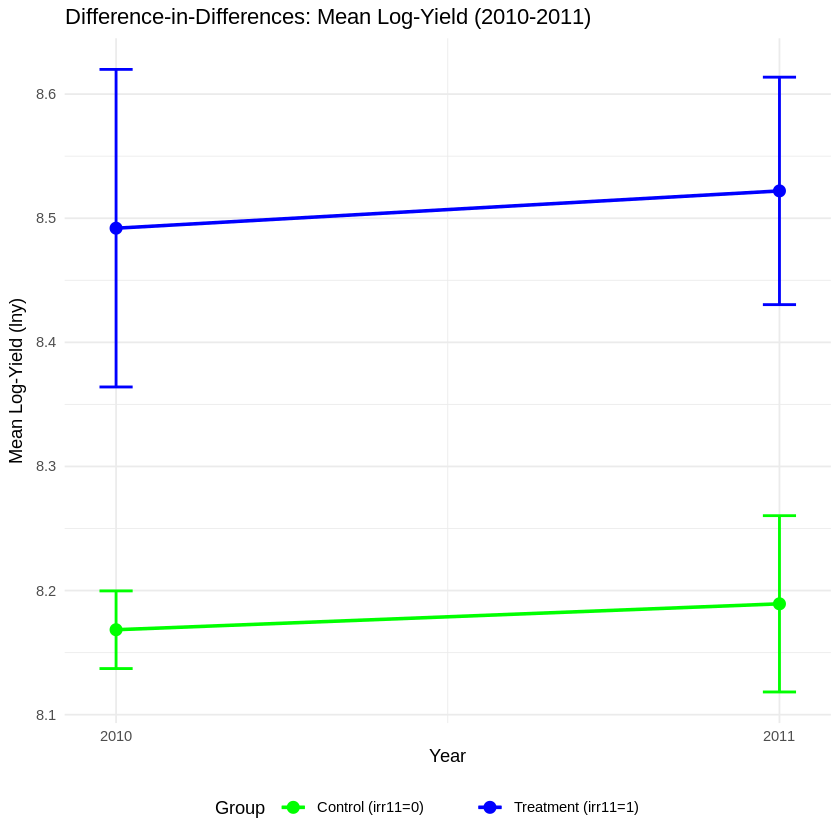

In [8]:


# Calculate means, SD, n, and SE
df_summary <- df_filtered %>%
  group_by(irr11, sur_yr) %>%
  summarize(
    mean_lny = mean(lny, na.rm = TRUE),
    sd_lny = sd(lny, na.rm = TRUE),
    n = n(),
    se_lny = sd_lny / sqrt(n),
    .groups = 'drop'
  )

# Pivot data into a 2x2 table
table_2x2 <- df_summary %>%
  select(irr11, sur_yr, mean_lny) %>%
  pivot_wider(
    names_from = sur_yr,
    values_from = mean_lny,
    names_prefix = "Year_"
  ) %>%
  mutate(Group = ifelse(irr11 == 1, "Treatment Group", "Control Group")) %>%
  select(Group, Year_2010, Year_2011)

print("--- Q3: 2x2 Table of Mean Log-Yield ---")
print(as.data.frame(table_2x2))



#3a: Plot means with error bars
did_plot <- ggplot(df_summary, aes(x = sur_yr, y = mean_lny, color = factor(irr11))) +
  geom_line(aes(group = factor(irr11)), size = 1) +
  geom_point(size = 3) +
  geom_errorbar(
    aes(ymin = mean_lny - se_lny, ymax = mean_lny + se_lny),
    width = 0.05,
    size = 0.8
  ) +
  scale_x_continuous(breaks = c(2010, 2011)) +
  scale_color_manual(
    name = "Group",
    values = c("0" = "green", "1" = "blue"),
    labels = c("0" = "Control (irr11=0)", "1" = "Treatment (irr11=1)")
  ) +
  labs(
    title = "Difference-in-Differences: Mean Log-Yield (2010-2011)",
    x = "Year",
    y = "Mean Log-Yield (lny)"
  ) +
  theme_minimal() +
  theme(legend.position = "bottom")

# Print the plot
print(did_plot)

### **Q4. Simple Regression of `lny` on `irr11` and `vdumsur_yr_2011`**

**a) Run a simple regression of `lny `on` irr11` and `vdumsur_yr_2011`.**




In [9]:

q4_model <- lm(lny ~ irr11 + vdumsur_yr_2011, data = df_filtered)


print(summary(q4_model))


Call:
lm(formula = lny ~ irr11 + vdumsur_yr_2011, data = df_filtered)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.5200 -0.1970  0.1520  0.4228  3.2047 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      8.16720    0.05111 159.785  < 2e-16 ***
irr11            0.32822    0.07468   4.395 1.27e-05 ***
vdumsur_yr_2011  0.02456    0.07322   0.335    0.737    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9521 on 740 degrees of freedom
Multiple R-squared:  0.02893,	Adjusted R-squared:  0.0263 
F-statistic: 11.02 on 2 and 740 DF,  p-value: 1.918e-05



**b) Interpret the coefficients on each variable and relate them to the means in your table from Q3. What is the marginal effect of being in the irrigation group?**

The intercept (8.16720) represents the control group's mean lny in 2010, vdumsur_yr_2011 (0.02456) is the average change in lny for the control group from 2010 to 2011, and irr11 (0.32822) is the average baseline difference in lny for the treatment group compared to the control group in 2010. The marginal effect of being in the irrigation group (irr11) is a 0.32822 increase in average lny holding the year constant, which represents the pre-existing difference (selection bias) between the groups.

### **Q5. DiD Regression of lny on` irr11`,` irr11_yr`, and `vdumsur_yr_2011`**

**a) Run a DiD regression of `lny` on `irr11`,` irr11_yr`, and `vdumsur_yr_2011`.**


In [10]:
# DiD regression with the interaction term

did_model <- lm(lny ~ irr11 + vdumsur_yr_2011 + irr11_yr, data = df_filtered)
summary(did_model)


Call:
lm(formula = lny ~ irr11 + vdumsur_yr_2011 + irr11_yr, data = df_filtered)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.5220 -0.1946  0.1508  0.4219  3.2071 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     8.168443   0.055007 148.499  < 2e-16 ***
irr11           0.323531   0.106914   3.026  0.00256 ** 
vdumsur_yr_2011 0.020884   0.094650   0.221  0.82543    
irr11_yr        0.009163   0.149502   0.061  0.95115    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9527 on 739 degrees of freedom
Multiple R-squared:  0.02893,	Adjusted R-squared:  0.02499 
F-statistic:  7.34 on 3 and 739 DF,  p-value: 7.486e-05


**b) Interpret the coefficients in your regression. What is the estimated treatment effect? What is the marginal effect of being in the irrigation group?**

Estimated treatment effect is the `irr11_yr` coefficient (0.009163), which is statistically insignificant (p=0.951), indicating the program had no impact. The marginal effect of being in the irrigation group is the `irr11` coefficient (0.323531), which represents the significant (p=0.002) pre-existing difference (selection bias) between the groups in 2010, while the intercept (8.168) is the control group's 2010 baseline and `vdumsur_yr_2011` (0.021) is the insignificant time trend.


### **Q6. Add Control Variables to the DiD Regression**

In this question, you’ll expand the original DiD regression model by including a set of control variables (`lnl,` `lnf`, `lnm`, `lnp`, `ageH`, etc.).

**a) Re-estimate the equation using OLS and observe any changes in your estimates.**




In [14]:
#  DiD regression with all available control variables

did_model_controls <- lm(lny ~ irr11 + vdumsur_yr_2011 + irr11_yr +
                               lnl + lnf + lnm + lnp +
                               lntot_acre + lnaindex + lnlindex + lndist +
                               sizehh,
                         data = df_filtered)
summary(did_model_controls)


Call:
lm(formula = lny ~ irr11 + vdumsur_yr_2011 + irr11_yr + lnl + 
    lnf + lnm + lnp + lntot_acre + lnaindex + lnlindex + lndist + 
    sizehh, data = df_filtered)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.1598 -0.2086  0.0966  0.3771  2.7992 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      4.793499   0.577080   8.306 4.78e-16 ***
irr11            0.062037   0.109472   0.567 0.571096    
vdumsur_yr_2011  0.033394   0.104521   0.319 0.749441    
irr11_yr         0.508022   0.171918   2.955 0.003227 ** 
lnl              0.118632   0.058945   2.013 0.044525 *  
lnf              0.140079   0.037335   3.752 0.000189 ***
lnm              0.256734   0.036508   7.032 4.68e-12 ***
lnp              0.051921   0.015032   3.454 0.000584 ***
lntot_acre      -0.033275   0.048478  -0.686 0.492678    
lnaindex         0.045017   0.062447   0.721 0.471207    
lnlindex         0.166316   0.060152   2.765 0.005837 ** 
lndist          -0.125251 

**b) Explain how the inclusion of these control variables impacts the estimates and provide reasoning for why these changes occur.**

In Q5, the irr11 coefficient (0.323) was large and significant because it incorrectly captured all pre-existing advantages of the treated group (e.g., better land, more inputs). By adding controls in Q6, the model now assigns those effects to the correct variables (like lnl, lnm, lnlindex), causing irr11 to become insignificant and revealing the "true," previously hidden, significant treatment effect (irr11_yr = 0.506).

## **Propensity Score Matching (PSM) Setup**

To conduct **Propensity Score Matching (PSM)** as a comparison to the DiD analysis, we start by filtering the dataset to include only observations from 2010. In this subset, we create a treatment indicator variable, `irr11`, which is set to 1 for parcels that received irrigation treatment in 2011 and 0 otherwise.

Using the `MatchIt `package, we perform PSM on the 2010 data, matching on relevant covariates (`lnl`, `lnf`, `lnm`, `lnp`, `ageH`, `genderH`, `sizehh`, `lnaindex`, and `lntot_acre`) and excluding variables like `lnlindex` and `lndist` to minimize potential confounding. We apply the common support option to limit matching to units within the region of support, which helps create a balanced matched sample.

Once matching is complete, we extract the matched data, adding a matched indicator to identify parcels included in the matched set. We then merge this matched indicator back into the full panel dataset to retain only matched parcels for subsequent analysis, ensuring consistency across comparisons.

In [13]:
# Subset data to only 2010 observations
df10 <- subset(df_filtered, sur_yr == 2010)

# Define matching covariates and clean to exclude variables with NAs
match.covs <- c("irr11", "lnl", "lnf", "lnm", "lnp",
                "ageH", "genderH", "sizehh", "lnaindex",
                "lntot_acre", "prcl_id")

# Run propensity score matching using MatchIt
mm <- matchit(irr11 ~ lnl + lnf + lnm + lnp +
                      ageH + genderH + sizehh +
                      lntot_acre + lnaindex,
              data = df10[,match.covs], distance = "logit",
              discard = "control", replace = TRUE)

# Extract matched data
md <- match.data(mm)

# Add a matched indicator and retain only necessary columns
md$matched <- 1
md <- md[, c("prcl_id", "matched")]

# Merge matched data indicator back into the full dataset to create a matched-panel dataset
mpdf <- merge(df_filtered, md, by = "prcl_id", all.x = TRUE)

# View the final matched-panel dataset
head(mpdf)

,prcl_id,country,vil_id,rain,average,dev,pop,dist,nomkt,vdsa_hh_id,⋯,irr,lnaindex,lnlindex,lntot_acre,lndist,irr0,irr11,vdumsur_yr_2011,irr11_yr,matched
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,117030008,India,117,464.9214,500.7051,0.9285335,6979,0,4,117030,⋯,1,-1.0824131,-0.6842707,1.0159732,0,1,1,1,1,NA
2,117030032,India,117,464.9214,500.7051,0.9285335,6979,0,4,117030,⋯,1,-1.0824131,-0.6842707,1.0159732,0,1,1,1,1,NA
3,117030056,India,117,464.9214,500.7051,0.9285335,6979,0,4,117030,⋯,1,-1.0824131,-0.6842707,1.0159732,0,1,1,1,1,NA
4,117037008,India,117,363.6663,500.7051,0.7263084,6979,0,4,117037,⋯,0,-0.8639487,-0.9085238,0.8671605,0,0,1,0,0,1
5,117037008,India,117,464.9214,500.7051,0.9285335,6979,0,4,117037,⋯,1,-1.0582682,-0.9085238,0.8671605,0,1,1,1,1,1
6,117037032,India,117,363.6663,500.7051,0.7263084,6979,0,4,117037,⋯,0,-0.8639487,-0.9085238,0.8671605,0,0,1,0,0,1


### **Q7. DiD Analysis with PSM Data**

In this question, you will recreate the DiD variables with the matched sample and perform DiD analysis as before, including our standard set of control variables.

**Part (a): Compare the number of observations between the DiD and DiD with PSM approaches. Discuss whether any reduction in observations affects the external validity of our impact assessment.**





In [15]:


# Subset data to 2010 observations
df10 <- subset(df_filtered, sur_yr == 2010)

# Define matching covariates (REMOVED ageH and genderH)
match.covs <- c("irr11", "lnl", "lnf", "lnm", "lnp",
                "sizehh", "lnaindex",
                "lntot_acre", "prcl_id")

# Use na.omit to remove rows with NAs in the matching variables
df10_clean <- na.omit(df10[, match.covs])

# Run propensity score matching
mm <- matchit(irr11 ~ lnl + lnf + lnm + lnp +
                    sizehh + lntot_acre + lnaindex,
              data = df10_clean, # Use the clean, no-NA dataframe
              distance = "logit",
              discard = "control",
              replace = TRUE)

# Extract matched data (prcl_id's)
md <- match.data(mm)

# Add a matched indicator and retain only prcl_id and the indicator
md$matched <- 1
md <- md[, c("prcl_id", "matched")]

# Merge matched data indicator back into the full 'df_filtered' dataset
mpdf <- merge(df_filtered, md, by = "prcl_id", all.x = TRUE)



# This 'mpdf_matched_only' dataframe is what you will use for the Q7b regression
mpdf_matched_only <- dplyr::filter(mpdf, matched == 1)

# Get the number of observations for comparison
original_obs <- nrow(df_filtered)
matched_obs <- nrow(mpdf_matched_only)

print(paste("Original DiD observations (from df_filtered):", original_obs))
print(paste("DiD with PSM observations (from mpdf_matched_only):", matched_obs))

[1] "Original DiD observations (from df_filtered): 743"
[1] "DiD with PSM observations (from mpdf_matched_only): 305"


The original DiD model used 743 observations, while the PSM-matched sample is significantly smaller at 305 observations because it discards non-comparable control units (those outside the common support) and any rows with missing covariate data. This large reduction limits external validity, as the new impact estimate only applies to the more homogenous, matched subset of the population, not the full original sample.


**Part (b): Compare the results of the two approaches (DiD alone and DiD with PSM). Discuss if either approach has stronger internal validity and provide reasoning.**

In [16]:
#matched-panel dataset

did_model_psm <- lm(lny ~ irr11 + vdumsur_yr_2011 + irr11_yr +
                          lnl + lnf + lnm + lnp +
                          lntot_acre + lnaindex + lnlindex + lndist +
                          sizehh,
                    data = mpdf_matched_only) # matched data
summary(did_model_psm)


Call:
lm(formula = lny ~ irr11 + vdumsur_yr_2011 + irr11_yr + lnl + 
    lnf + lnm + lnp + lntot_acre + lnaindex + lnlindex + lndist + 
    sizehh, data = mpdf_matched_only)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.8468 -0.1034  0.1934  0.4819  2.4731 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.180636   1.437740   0.126  0.90010    
irr11            0.034008   0.199646   0.170  0.86486    
vdumsur_yr_2011 -0.431454   0.361809  -1.192  0.23404    
irr11_yr         1.303359   0.424290   3.072  0.00233 ** 
lnl              0.151359   0.134955   1.122  0.26297    
lnf              0.041121   0.183856   0.224  0.82318    
lnm              0.800610   0.103219   7.756 1.47e-13 ***
lnp              0.061322   0.049707   1.234  0.21832    
lntot_acre       0.036224   0.113599   0.319  0.75005    
lnaindex         0.054314   0.145007   0.375  0.70826    
lnlindex         0.038003   0.158373   0.240  0.81053    
lndist          -0.1

The DiD with PSM has stronger internal validity because it runs the regression on a 305-observation subset that was already matched on pre-treatment observables, creating a more balanced comparison group. This PSM step isolates the treatment effect from selection bias, unlike the Q6b model which only statistically adjusted for differences across all 743 units.


# **II. Instrumental Variables (IV)**

This next section of the assignment introduces **Instrumental Variables (IV)** analysis as a method to address potential endogeneity in estimating the impact of irrigation treatment on crop yield. Endogeneity issues can arise from omitted variables, measurement errors, or reverse causality, which may bias Ordinary Least Squares (OLS) estimates.

The section covers:

1.	**OLS Analysis with Controls:** Conducting a baseline OLS regression to assess the direct effect of irrigation on yield while accounting for other observable factors, helping us understand initial bias sources.

2.	**IV Selection and Construction:** Identifying and constructing an instrument (e.g., the interaction of household land ownership and village rainfall) that meets the requirements for a valid IV—relevance and exogeneity—while discussing the strengths and limitations of various IV choices.

3.	**Two-Stage Least Squares (2SLS) Regression:** Running a two-stage regression to isolate the treatment effect using the selected IV and control variables, followed by a single-stage IV regression with `ivreg` for comparison.

4.	**Instrument Validity Checks:** Conducting diagnostic tests like the [Wu-Hausman](https://en.wikipedia.org/wiki/Durbin%E2%80%93Wu%E2%80%93Hausman_test) and [Sargan-Hansen tests](https://en.wikipedia.org/wiki/Sargan%E2%80%93Hansen_test) to assess if the IV is appropriate, along with a falsification test to verify the instrument’s exogeneity.

This section aims to improve estimation accuracy by using IVs to adjust for endogeneity, comparing IV and OLS estimates to evaluate whether IV-based estimates better reflect the true treatment effect of irrigation on yield.



### **Q8: OLS Regression of Irrigation Treatment on Log Yield with Exogenous Controls**
**Run an OLS regression to examine the impact of irrigation treatment (`irr`) on the log of yield (`lny`), controlling for a set of exogenous variables (`lnl,` `lnf`, `lnm`, `lnp`, `ageH`, etc.).**




In [18]:
# Rerun initial df before starting
df_filtered <- dplyr::filter(df, sur_yr %in% c(2010, 2011))


# factor(sur_yr) to control for the year fixed effect
q8_model <- lm(lny ~ irr +
                     lnl + lnf + lnm + lnp +
                     lntot_acre + lnaindex + lnlindex + lndist +
                     sizehh + factor(sur_yr),
               data = df_filtered)

summary(q8_model)


Call:
lm(formula = lny ~ irr + lnl + lnf + lnm + lnp + lntot_acre + 
    lnaindex + lnlindex + lndist + sizehh + factor(sur_yr), data = df_filtered)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.1238 -0.2165  0.0907  0.3843  2.7951 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         4.818871   0.575074   8.380 2.71e-16 ***
irr                 0.555469   0.150082   3.701 0.000231 ***
lnl                 0.116137   0.058753   1.977 0.048451 *  
lnf                 0.141383   0.037247   3.796 0.000159 ***
lnm                 0.259104   0.036251   7.148 2.14e-12 ***
lnp                 0.052023   0.015024   3.463 0.000566 ***
lntot_acre         -0.037145   0.047972  -0.774 0.438999    
lnaindex            0.047644   0.062246   0.765 0.444275    
lnlindex            0.165726   0.060115   2.757 0.005983 ** 
lndist             -0.131279   0.034063  -3.854 0.000126 ***
sizehh             -0.003701   0.009197  -0.402 0.687484    
factor(su

### **Part (a): Why could this estimate be biased? Discuss potential omitted variable bias, measurement errors, and endogeneity issues that might affect the estimate.**

The estimate is likely biased due to unobserved factors like farmer skill, soil quality, or motivation could correlate with both the decision to adopt irrigation (irr) and the final yield (lny), creating omitted variable bias. Furthermore, simultaneity bias could exist if farmers with higher expected yields are more likely to choose to invest in irrigation, meaning irr is not an independent variable


### **Part(b): Identify Potential IVs: Review the dataset and discuss which variables could serve as IVs for irrigation treatment, focusing on variables related to household characteristics or environmental factors.**


A strong potential IV is lndist (distance to plot), as plot distance likely affects the cost and decision to irrigate but should not directly affect crop yield after controlling for other inputs. Household characteristics like sizehh (household size) or lntot_acre (land owned) are weaker candidates, as they could plausibly influence yield directly (e.g., through labor supply or economies of scale), violating the exclusion restriction.





Next, we’ll run some IV regressions. We construct an instrumental variable by
interacting household land ownership (`tot_acre`) with village-level yearly rainfall (`rain`). Then, we’ll exclude observations where rainfall data is missing.

In [19]:
# Step 1: Create the interaction term to be used as an instrumental variable
df_filtered <- df_filtered %>%
  mutate(IV_landrain = tot_acre * rain)

# Step 2: Filter out rows with missing values in IV_landrain to avoid NA issues
ivdf <- subset(df_filtered, !is.na(IV_landrain))

### **Q9: Why might IV_landrain (the interaction of land ownership and rainfall) be a valid instrument for irrigation? What are the pros and cons of using only rainfall or land ownership as separate instruments? What are the requirements for a valid IV?**


The incentive to irrigate (driven by `rain`) is strongest for farmers with more `tot_acre`, and this specific interaction plausibly affects yield *only* through its impact on the irrigation decision. Using `rain` or `tot_acre` alone is invalid as they both directly impact yield, violating the **exclusion restriction**, which, along with relevance (correlation with `irr`), is a mandatory requirement for any IV.





## **Two-Stage Least Squares (2SLS) Approach with Piecewise Regression**

We' ll perform a 2SLS approach by first running an OLS regression to predict irrigation treatment using the instrument and control variables. Then, we use the predicted values in a second-stage regression to estimate the impact of irrigation on yield.

**1.	First Stage:** We regress irrigation treatment on the instrument and control variables.

**2.	Second Stage:** We regress log yield on the predicted values from the first stage along with control variables.


In [20]:
# Step 1: First stage regression of treatment on instrument and controls
st1 <- lm(irr ~ IV_landrain + lnl + lnf + lnm + lnp + ageH + genderH + sizehh +
          lnaindex + lnlindex + lntot_acre, data = ivdf)

# Predicted values from the first stage
ivdf <- ivdf %>%
  mutate(irrhat = st1$fitted.values)

# Step 2: Second stage regression using the predicted values from first stage
st2 <- lm(lny ~ irrhat + lnl + lnf + lnm + lnp + ageH + genderH + sizehh +
          lnaindex + lnlindex + lntot_acre, data = ivdf)

# Display the second stage regression results
summary(st2)


Call:
lm(formula = lny ~ irrhat + lnl + lnf + lnm + lnp + ageH + genderH + 
    sizehh + lnaindex + lnlindex + lntot_acre, data = ivdf)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.8207 -0.2222  0.1970  0.4093  2.4257 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.580420   6.124392  -0.911   0.3627    
irrhat       3.015794   1.539513   1.959   0.0507 .  
lnl          0.905065   0.539360   1.678   0.0940 .  
lnf          0.648562   0.266853   2.430   0.0155 *  
lnm          0.340581   0.071129   4.788 2.27e-06 ***
lnp          0.115258   0.067914   1.697   0.0903 .  
ageH         0.002019   0.004412   0.458   0.6474    
genderH      0.340688   0.319020   1.068   0.2861    
sizehh      -0.014440   0.013684  -1.055   0.2919    
lnaindex     0.072920   0.098178   0.743   0.4580    
lnlindex     0.186183   0.113867   1.635   0.1027    
lntot_acre   0.289643   0.242159   1.196   0.2323    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05

## **Instrumental Variable Regression with ivreg from `AER` Package**
Using the `ivreg` function from the `AER` package, we conduct an IV regression and compare its results with the two-stage regression. We include the instrument and exogenous variables as instruments in the function.



In [21]:
# Load necessary library
library(AER)

# Step 1: Run IV regression using `ivreg` function from AER package
iv.model <- ivreg(
  formula = lny ~ irr + lnl + lnf + lnm + lnp +
                   ageH + genderH + sizehh +
                   lnaindex + lnlindex + lntot_acre + lndist |
                   IV_landrain + lnl + lnf + lnm + lnp +
                   ageH + genderH + sizehh +
                   lnaindex + lnlindex + lntot_acre + lndist,
  data = ivdf
)

# Display summary of the IV regression results
summary(iv.model)


Call:
ivreg(formula = lny ~ irr + lnl + lnf + lnm + lnp + ageH + genderH + 
    sizehh + lnaindex + lnlindex + lntot_acre + lndist | IV_landrain + 
    lnl + lnf + lnm + lnp + ageH + genderH + sizehh + lnaindex + 
    lnlindex + lntot_acre + lndist, data = ivdf)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.3038  -2.1453   0.1943   1.9906  16.7168 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) -48.24805  171.94529  -0.281    0.779
irr          12.98499   40.51172   0.321    0.749
lnl           4.40697   14.21172   0.310    0.757
lnf           2.18681    6.28253   0.348    0.728
lnm           0.69801    1.44970   0.481    0.630
lnp           0.36088    1.05845   0.341    0.733
ageH          0.01515    0.04620   0.328    0.743
genderH       1.93777    6.21520   0.312    0.755
sizehh       -0.04220    0.10484  -0.403    0.687
lnaindex      0.64150    2.04981   0.313    0.754
lnlindex     -0.38375    2.23452  -0.172    0.864
lntot_acre    1.5

### **Q10: Compare the point estimates and standard errors between the “two-stage” approach and the “single-stage” approach. Do the coefficient estimates differ? How about the standard errors? Check if the Wu-Hausman test suggests that OLS estimates are biased.**

**Hint: Use `summary()` to examine the results from the “single-stage” IV regression and include the argument `diagnostics = TRUE` to display diagnostics for IV validity.**


In [22]:

# The 'iv.model' object was created in the "given" section.

summary(iv.model, diagnostics = TRUE)



Call:
ivreg(formula = lny ~ irr + lnl + lnf + lnm + lnp + ageH + genderH + 
    sizehh + lnaindex + lnlindex + lntot_acre + lndist | IV_landrain + 
    lnl + lnf + lnm + lnp + ageH + genderH + sizehh + lnaindex + 
    lnlindex + lntot_acre + lndist, data = ivdf)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.3038  -2.1453   0.1943   1.9906  16.7168 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) -48.24805  171.94529  -0.281    0.779
irr          12.98499   40.51172   0.321    0.749
lnl           4.40697   14.21172   0.310    0.757
lnf           2.18681    6.28253   0.348    0.728
lnm           0.69801    1.44970   0.481    0.630
lnp           0.36088    1.05845   0.341    0.733
ageH          0.01515    0.04620   0.328    0.743
genderH       1.93777    6.21520   0.312    0.755
sizehh       -0.04220    0.10484  -0.403    0.687
lnaindex      0.64150    2.04981   0.313    0.754
lnlindex     -0.38375    2.23452  -0.172    0.864
lntot_acre    1.5



The coefficient estimates differ significantly (12.985 in `ivreg` vs. 3.016 in manual 2SLS), and the `ivreg` standard error is correctly calculated to be much larger (40.512 vs. 1.540) because the manual `lm()` approach underreports uncertainty. The Wu-Hausman test p-value is 0.350; since this is \> 0.05, we fail to reject the null hypothesis and conclude the test finds no statistical evidence that the OLS estimates are biased.


## **Falsification Test for Instrument Validity**

In this section, we will assess the validity of our instrument by conducting a *falsification test*. The objective is to check if the instrument (`IV_landrain`) directly impacts the outcome variable (`log yield`, `lny`) rather than influencing it solely through the endogenous treatment variable (irrigation).

To do this, we regress `lny` on `IV_landrain` and our set of control variables, excluding the treatment variable (`irr)`. If `IV_landrain` has a statistically significant effect on `lny` in this regression, it may indicate that the instrument violates the exogeneity condition, as it should only affect the outcome indirectly through the treatment.

In [23]:
# Falsification test to check if IV affects yield directly
falsification_test <- lm(lny ~ IV_landrain + lnl + lnf + lnm + lnp + ageH +
                         genderH + sizehh + lnaindex + lnlindex + lntot_acre +
                         lndist, data = ivdf)

# Display results
summary(falsification_test, diagnostics = TRUE)


Call:
lm(formula = lny ~ IV_landrain + lnl + lnf + lnm + lnp + ageH + 
    genderH + sizehh + lnaindex + lnlindex + lntot_acre + lndist, 
    data = ivdf)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.7803 -0.1968  0.1211  0.4258  2.4161 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.838e+00  6.756e-01  10.121  < 2e-16 ***
IV_landrain -1.847e-05  1.885e-05  -0.980 0.327572    
lnl         -1.313e-01  7.975e-02  -1.647 0.100333    
lnf          1.485e-01  1.067e-01   1.391 0.164824    
lnm          2.387e-01  4.853e-02   4.918 1.22e-06 ***
lnp          2.047e-02  3.771e-02   0.543 0.587617    
ageH         8.698e-04  4.319e-03   0.201 0.840475    
genderH     -5.412e-02  2.909e-01  -0.186 0.852484    
sizehh      -1.058e-02  1.359e-02  -0.778 0.436802    
lnaindex    -7.571e-03  1.004e-01  -0.075 0.939946    
lnlindex     3.515e-01  1.038e-01   3.386 0.000771 ***
lntot_acre  -6.746e-02  1.002e-01  -0.673 0.501175    
lndist      -1.581e-

### **Q11. Does the instrument have a significant impact on yields? Does this mean our instrument is valid? Why might it still not be a valid instrument?**



No, the falsification test shows `IV_landrain` does not have a significant direct impact on yield (p=0.328), which provides support for the **exclusion restriction**. This does not mean the instrument is valid, because it still fails the relevance requirement, as shown by the weak instrument diagnostic test (p=0.751).



## **Testing Instrument Strength with Overidentified System**

In this section, we assess the validity and strength of our instruments by creating an overidentified system, where we have more instruments than endogenous variables. Specifically, we use three instruments:

**1.	Rainfall:** Measures annual rainfall, capturing environmental factors that may indirectly affect yield through its impact on irrigation needs.

**2.	Land Ownership (`tot_acre`):**Reflects the total land a household owns, which may correlate with the likelihood of irrigation use and farming intensity.

**3.	Interaction of Rainfall and Land Ownership (`IV_landrain`):** Combines environmental and household factors, aiming to strengthen the instrument by capturing both resource availability and environmental conditions.

By using these three instruments to explain one endogenous variable (irrigation), our system is **overidentified.** This setup allows us to apply the **Sargan-Hansen test** (available in `summary(iv.model, diagnostics = TRUE)` in `R`) to check for instrument exogeneity. If the instruments are valid, they should influence the outcome variable (yield) only through the endogenous variable (irrigation), not directly.

**Why Overidentification Matters ?**

In an overidentified system, the Sargan test can assess whether our instruments meet the **exogeneity** condition, meaning they must be uncorrelated with the error term in the yield equation. A high p-value for the Sargan test would indicate that we cannot reject the exogeneity of the instruments, thus supporting their validity. Conversely, a low p-value suggests that at least one instrument may be invalid, potentially introducing bias.



In [24]:
# Overidentified IV model with multiple instruments
iv.model2 <- ivreg(lny ~ irr + lnl + lnf + lnm + lnp + ageH + genderH + sizehh +
                   lnaindex + lnlindex + lntot_acre + lndist |
                   IV_landrain + rain + tot_acre + lnl + lnf + lnm + lnp +
                   ageH + genderH + sizehh + lnaindex + lnlindex + lntot_acre +
                   lndist, data = ivdf)

# Display results with Sargan-Hansen diagnostics for overidentified system
summary(iv.model2, diagnostics = TRUE)


Call:
ivreg(formula = lny ~ irr + lnl + lnf + lnm + lnp + ageH + genderH + 
    sizehh + lnaindex + lnlindex + lntot_acre + lndist | IV_landrain + 
    rain + tot_acre + lnl + lnf + lnm + lnp + ageH + genderH + 
    sizehh + lnaindex + lnlindex + lntot_acre + lndist, data = ivdf)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.8665 -0.1663  0.1025  0.4461  2.9553 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.879207   5.394003   0.163   0.8706    
irr          1.409367   1.261098   1.118   0.2643    
lnl          0.346756   0.449072   0.772   0.4404    
lnf          0.393931   0.220543   1.786   0.0747 .  
lnm          0.285951   0.065808   4.345 1.71e-05 ***
lnp          0.060226   0.049658   1.213   0.2258    
ageH         0.002497   0.004505   0.554   0.5796    
genderH      0.180058   0.346024   0.520   0.6031    
sizehh      -0.014687   0.013804  -1.064   0.2879    
lnaindex     0.062406   0.118041   0.529   0.5973    
lnlindex     0.

### **Q12: Are you instruments endogenous? Look at the results of the Sargan-Hansen test. What does this tell you? Interpret your IV results. Do you think that your IV estimates are better than the OLS estimates? Explain.**



The Sargan test (p=0.3989) suggests the instruments are not endogenous (i.e., they are validly exogenous), but the weak instruments test (F=3.735, p=0.0113) shows they are weak, making the insignificant IV estimate (p=0.264) unreliable. The Wu-Hausman test (p=0.622) fails to find any evidence that the original OLS estimate was biased to begin with. Therefore, the IV estimates are **not better** than the OLS estimates because the instruments are weak and there was no statistical need for an IV.

<pre><code></code></pre>

<pre><code></code></pre>

<table style="border: 1px solid #4CAF50; background-color: #f9f9f9; padding: 10px; width: 100%;">
  <tr>
    <td>
      <h2 style="font-family: 'Times New Roman'; font-size: 22px; color: #333;">
        <b>This Concludes Assignment 3</b>
      </h2>
      <p style="font-family: 'Times New Roman'; font-size: 16px; color: #333;">
        Make sure to submit your completed assignment on Gradescope.
        Be sure to save your file as <b>initials_assignment3.ipynb</b>,
        where "initials" are your initials.
      </p>
      <p style="font-family: 'Times New Roman'; font-size: 16px; color: #333;">
        Good luck, and feel free to reach out with any questions before the due date!
      </p>
    </td>
  </tr>
</table>



---

